In [1]:
import flopy
import flopy.mf6 as mf6
import flopy.plot as fplt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm

In [2]:
# Load Simulation
sim = mf6.MFSimulation.load(sim_name='peterson', exe_name='../../mf6/mf6.exe', sim_ws='../input-files/')

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package riv...
    loading package obs...
    loading package wel...
    loading package chd...
    loading package sto...
    loading package rch...
    loading package oc...
    loading package rch...
  loading model gwt6...
    loading package dis...
    loading package ic...
    loading package adv...
    loading package dsp...
    loading package mst...
    loading package ist...
    loading package ssm...
    loading package obs...
    loading package oc...
  loading model gwt6...
    loading package dis...
    loading package ic...
    loading package adv...
    loading package dsp...
    loading package ist...
    loading package mst...
    loading package ssm...
    loading package obs...
    loading package oc...
  loading model gwt6...
    loading package dis...
    loading packag

In [3]:
# Get flow model
gwf = sim.get_model('peterson_flow')

# Get PFOS model
gwt_pfos = sim.get_model('peterson_pfos')

In [4]:
pfos_wells = pd.read_csv('../output-files/pfos_obs.csv', index_col='time')

In [5]:
# Function to check convertibility
def is_convertible_to_float(val):
    try:
        float(val)
        return True
    except (ValueError, TypeError):
        return False

In [6]:
upstream = pd.read_excel('../input-files/data-files/tran-PFAS-targets.xlsx')
downstream = pd.read_csv('../input-files/data-files/tran-targets-downstream.csv')

In [7]:
pfos_wells.loc[:, ['W8', 'W9', 'W12','S17']]

,W8,W9,W12,S17
time,,,,
59.0,0.000000,0.000000,0.000000,0.000000
89.0,0.000000,0.000000,0.000000,0.000000
274.0,0.000000,0.000000,0.000000,0.000000
304.0,0.000000,0.000000,0.000000,0.000000
365.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
18139.0,0.000165,0.000131,0.000107,0.000029
18169.0,0.000168,0.000133,0.000109,0.000030
18200.0,0.000171,0.000136,0.000111,0.000030


In [8]:
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [9]:
observations_pfos = pd.read_csv('../input-files/data-files/tran-PFOS-observations.csv')

In [10]:
observations_pfos['SDate'] = pd.to_datetime(observations_pfos['SDate'])

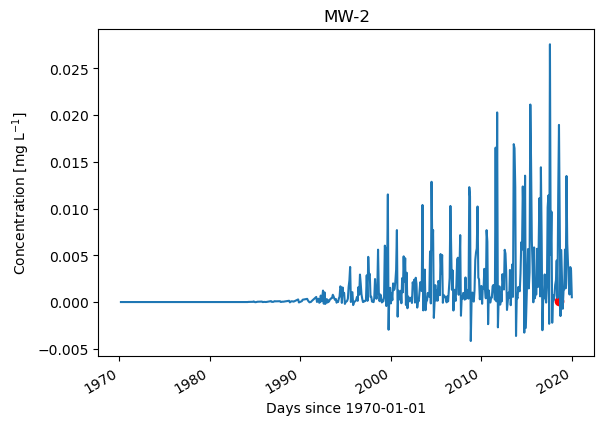

In [11]:
fig, ax = plt.subplots()

convertible_indexes = pfos_wells.index[pfos_wells['MW-2'].apply(is_convertible_to_float)].to_numpy()
well = pfos_wells.loc[convertible_indexes, 'MW-2'].to_numpy('float64')

# Convert x-axis values (convertible_indexes) to datetime
start_date = datetime(1970, 1, 1)
date_indexes = [start_date + timedelta(days=int(x)) for x in convertible_indexes]

ax.scatter(observations_pfos.SDate, observations_pfos['MW-2'] * 1e-9, c='r')
ax.plot(date_indexes, well)#, label=column)
ax.set_ylabel('Concentration [mg L$^{-1}$]')
ax.set_xlabel('Days since 1970-01-01')
ax.set_title('MW-2')



# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the x-axis with dates
fig.autofmt_xdate()  # Rotate date labels for better readability

# ax.legend()
    
plt.show()

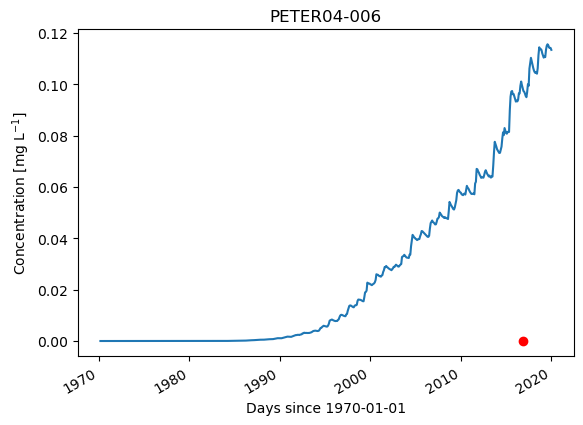

In [12]:
fig, ax = plt.subplots()

convertible_indexes = pfos_wells.index[pfos_wells['PETER04-006'].apply(is_convertible_to_float)].to_numpy()
well = pfos_wells.loc[convertible_indexes, 'PETER04-006'].to_numpy('float64')

# Convert x-axis values (convertible_indexes) to datetime
start_date = datetime(1970, 1, 1)
date_indexes = [start_date + timedelta(days=int(x)) for x in convertible_indexes]

ax.scatter(observations_pfos.SDate, observations_pfos['PETER04-006'] * 1e-9, c='r')
ax.plot(date_indexes, well)#, label=column)
ax.set_ylabel('Concentration [mg L$^{-1}$]')
ax.set_xlabel('Days since 1970-01-01')

ax.set_title('PETER04-006')
# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the x-axis with dates
fig.autofmt_xdate()  # Rotate date labels for better readability

# ax.legend()
    
plt.show()

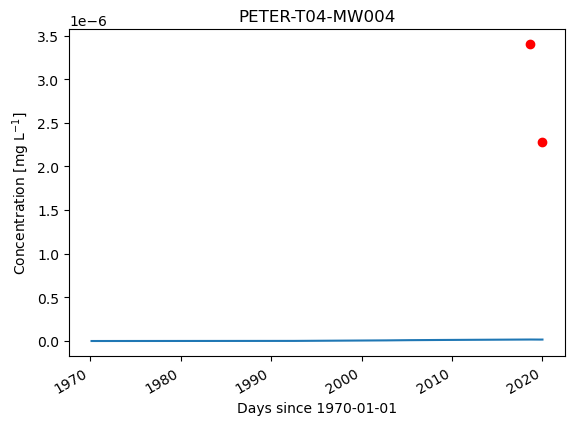

In [13]:
fig, ax = plt.subplots()

convertible_indexes = pfos_wells.index[pfos_wells['PETER-T04-MW004'].apply(is_convertible_to_float)].to_numpy()
well = pfos_wells.loc[convertible_indexes, 'PETER-T04-MW004'].to_numpy('float64')

# Convert x-axis values (convertible_indexes) to datetime
start_date = datetime(1970, 1, 1)
date_indexes = [start_date + timedelta(days=int(x)) for x in convertible_indexes]

ax.scatter(observations_pfos.SDate, observations_pfos['PETER-T04-MW004'] * 1e-9, c='r')
ax.plot(date_indexes, well)#, label=column)
ax.set_ylabel('Concentration [mg L$^{-1}$]')
ax.set_xlabel('Days since 1970-01-01')

ax.set_title('PETER-T04-MW004')
# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the x-axis with dates
fig.autofmt_xdate()  # Rotate date labels for better readability

# ax.legend()
    
plt.show()

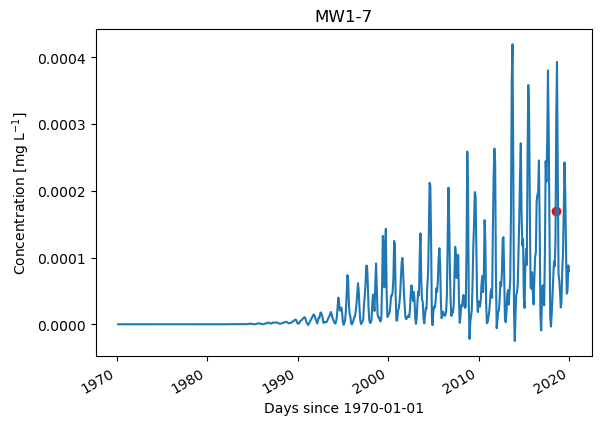

In [14]:
fig, ax = plt.subplots()

convertible_indexes = pfos_wells.index[pfos_wells['MW1-7'].apply(is_convertible_to_float)].to_numpy()
well = pfos_wells.loc[convertible_indexes, 'MW1-7'].to_numpy('float64')

# Convert x-axis values (convertible_indexes) to datetime
start_date = datetime(1970, 1, 1)
date_indexes = [start_date + timedelta(days=int(x)) for x in convertible_indexes]

ax.scatter(observations_pfos.SDate, observations_pfos['MW1-7'] * 1e-9, c='r')
ax.plot(date_indexes, well)#, label=column)
ax.set_ylabel('Concentration [mg L$^{-1}$]')
ax.set_xlabel('Days since 1970-01-01')

ax.set_title('MW1-7')

# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the x-axis with dates
fig.autofmt_xdate()  # Rotate date labels for better readability

# ax.legend()
    
plt.show()

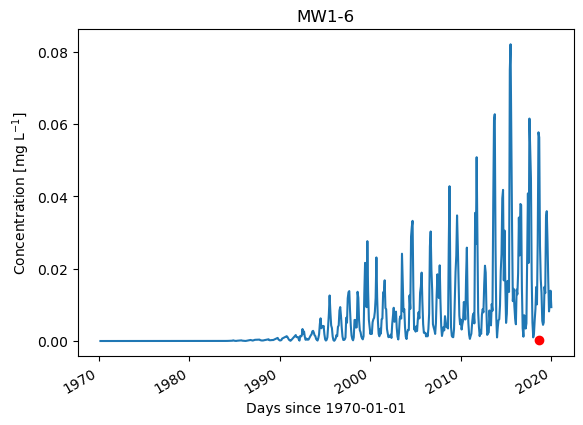

In [15]:
fig, ax = plt.subplots()

convertible_indexes = pfos_wells.index[pfos_wells['MW1-6'].apply(is_convertible_to_float)].to_numpy()
well = pfos_wells.loc[convertible_indexes, 'MW1-6'].to_numpy('float64')

# Convert x-axis values (convertible_indexes) to datetime
start_date = datetime(1970, 1, 1)
date_indexes = [start_date + timedelta(days=int(x)) for x in convertible_indexes]

ax.scatter(observations_pfos.SDate, observations_pfos['MW1-7'] * 1e-9, c='r')
ax.plot(date_indexes, well)#, label=column)
ax.set_ylabel('Concentration [mg L$^{-1}$]')
ax.set_xlabel('Days since 1970-01-01')

ax.set_title('MW1-6')

# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the x-axis with dates
fig.autofmt_xdate()  # Rotate date labels for better readability

# ax.legend()
    
plt.show()

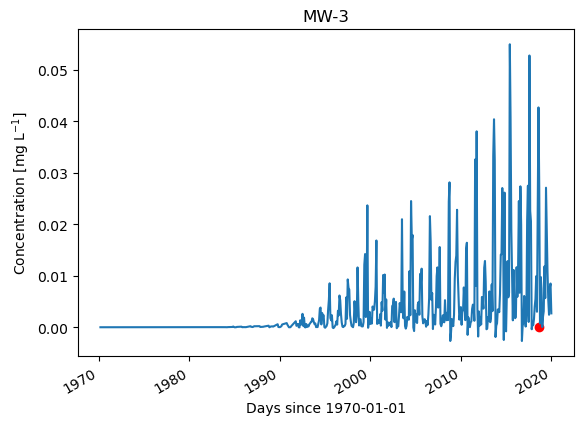

In [16]:
fig, ax = plt.subplots()

convertible_indexes = pfos_wells.index[pfos_wells['MW-3'].apply(is_convertible_to_float)].to_numpy()
well = pfos_wells.loc[convertible_indexes, 'MW-3'].to_numpy('float64')

# Convert x-axis values (convertible_indexes) to datetime
start_date = datetime(1970, 1, 1)
date_indexes = [start_date + timedelta(days=int(x)) for x in convertible_indexes]

ax.scatter(observations_pfos.SDate, observations_pfos['MW-3'] * 1e-9, c='r')
ax.plot(date_indexes, well)#, label=column)
ax.set_ylabel('Concentration [mg L$^{-1}$]')
ax.set_xlabel('Days since 1970-01-01')

ax.set_title('MW-3')

# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the x-axis with dates
fig.autofmt_xdate()  # Rotate date labels for better readability

# ax.legend()
    
plt.show()

KeyError: 'S17'

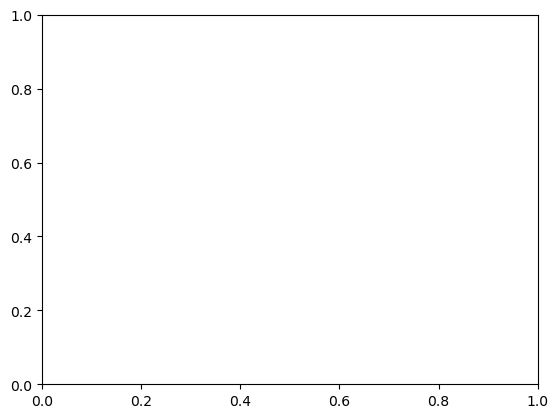

In [17]:
fig, ax = plt.subplots()

convertible_indexes = pfos_wells.index[pfos_wells['S17'].apply(is_convertible_to_float)].to_numpy()
well = pfos_wells.loc[convertible_indexes, 'S17'].to_numpy('float64')

# Convert x-axis values (convertible_indexes) to datetime
start_date = datetime(1970, 1, 1)
date_indexes = [start_date + timedelta(days=int(x)) for x in convertible_indexes]

ax.scatter(observations_pfos.SDate, observations_pfos['S17'] * 1e-9, c='r')
ax.plot(date_indexes, well)#, label=column)
ax.set_ylabel('Concentration [mg L$^{-1}$]')
ax.set_xlabel('Days since 1970-01-01')

ax.set_title('S17')

# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the x-axis with dates
fig.autofmt_xdate()  # Rotate date labels for better readability

# ax.legend()
    
plt.show()